# Step 1: Data preprocessing

We will read the CSV files generate by `preprocess_dataset.py`, format the data as appropriate and split the training set into training and validation sets.

In [1]:
import pandas as pd
import numpy as np

# Load training and test data
train_data = pd.read_csv('data/train_data.csv')
test_data = pd.read_csv('data/test_data.csv')

# Define input features (X) and output target (y)
X_train = train_data.iloc[:, :-1].values  # All columns except the last (inputs)
y_train = train_data.iloc[:, -1].values  # Last column (output)
y_train = y_train.reshape(-1, 1).flatten()

X_test = test_data.iloc[:, :-1].values  # All columns except the last (inputs)
y_test = test_data.iloc[:, -1].values  # Last column (output)
y_test = y_test.reshape(-1, 1).flatten()

# Step 2: Implement and train BP-based Neural Network

Now we will use the `NeuralNet` implementation with varying hyperparameters, to see which combination performs better.

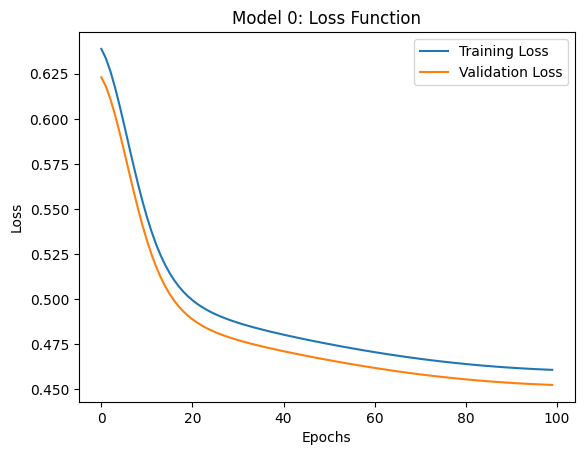

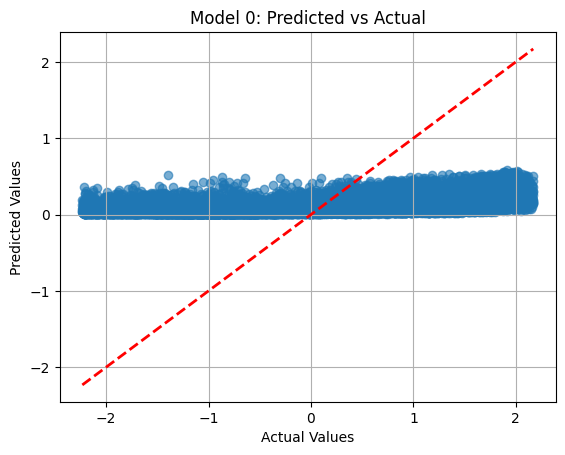

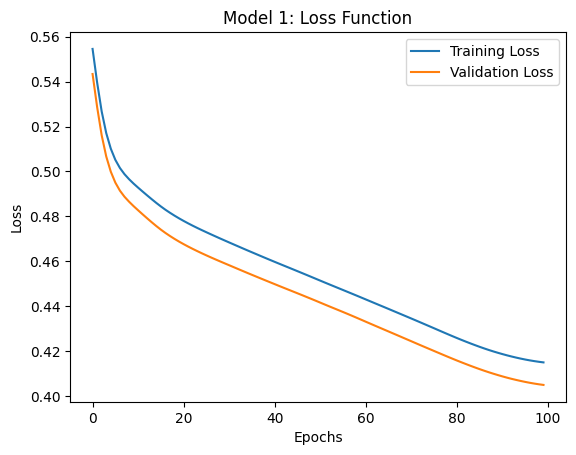

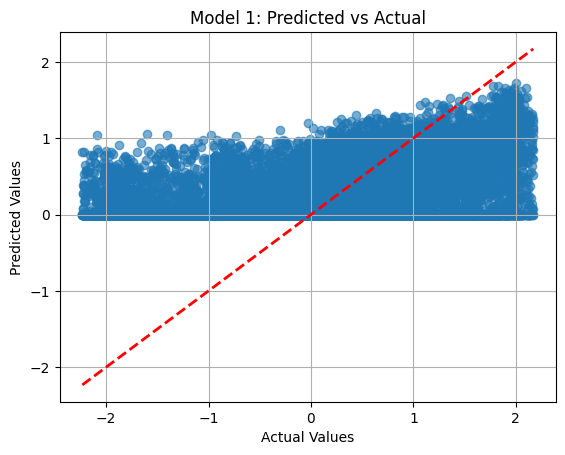

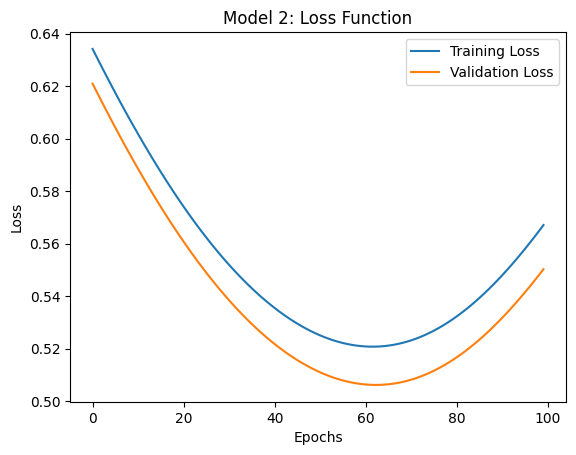

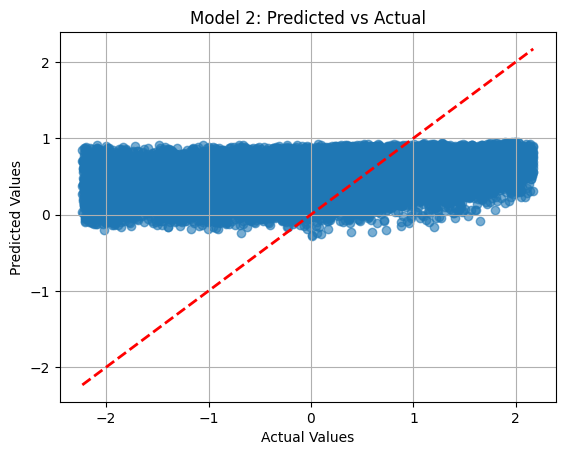

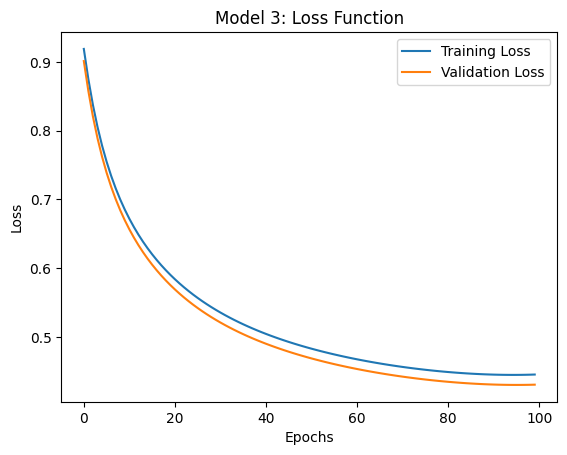

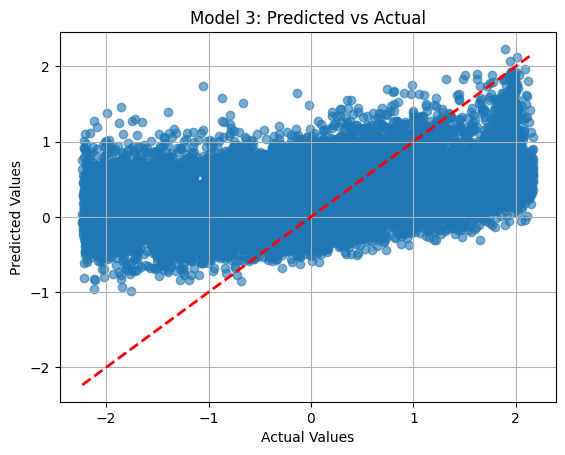

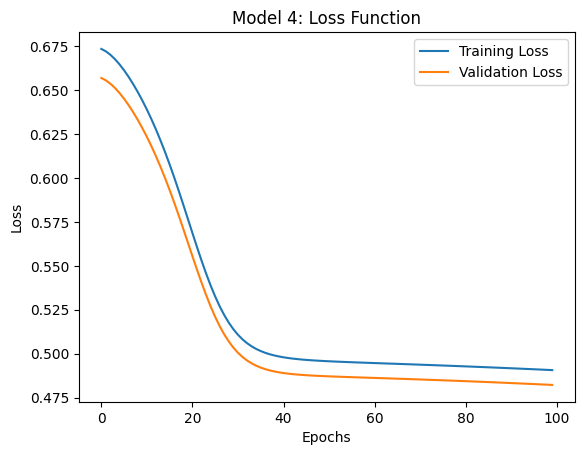

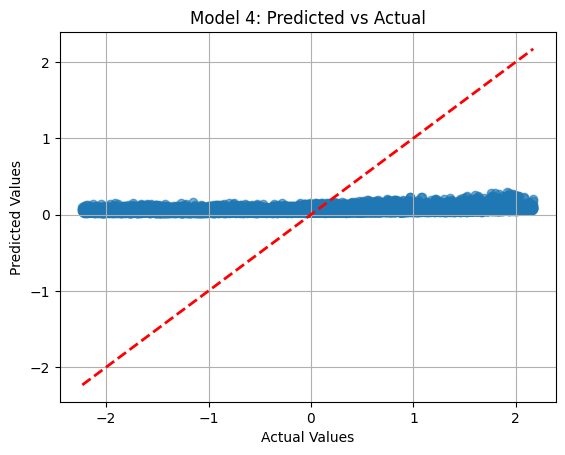

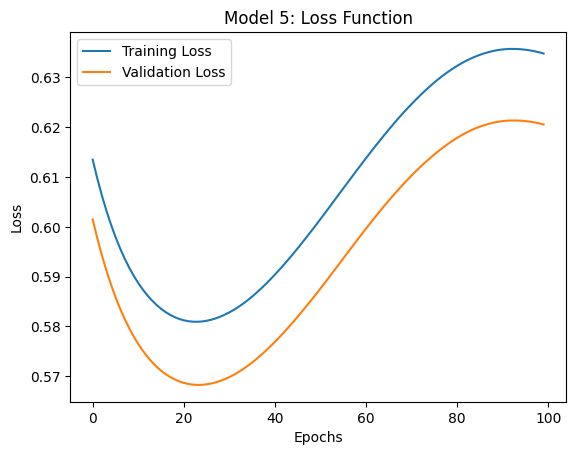

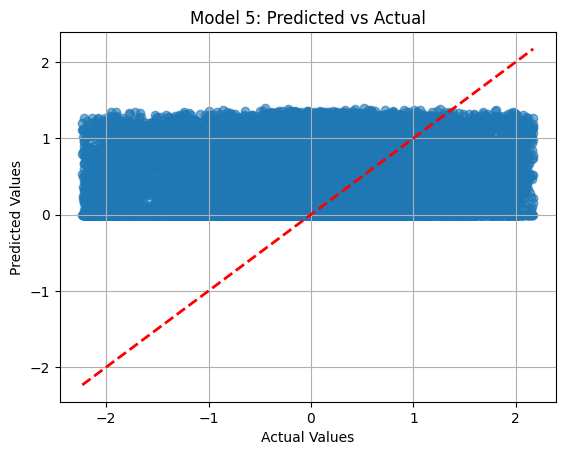

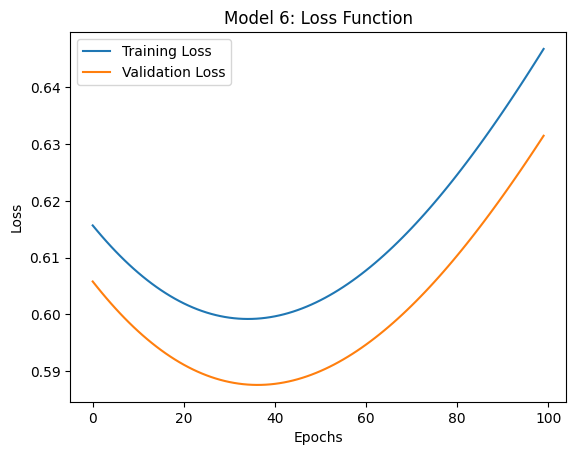

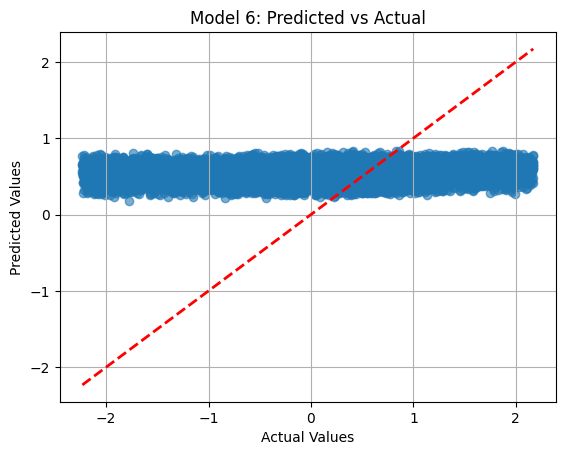

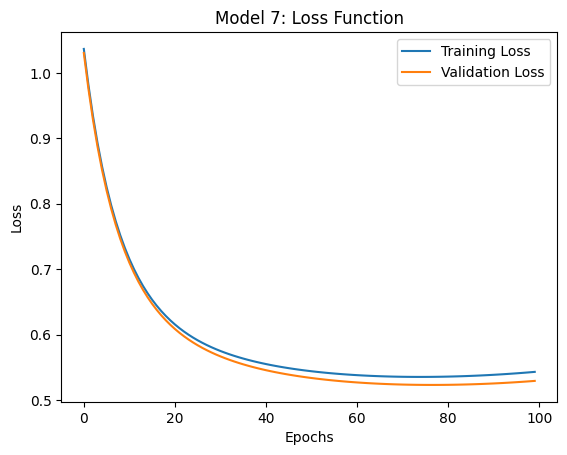

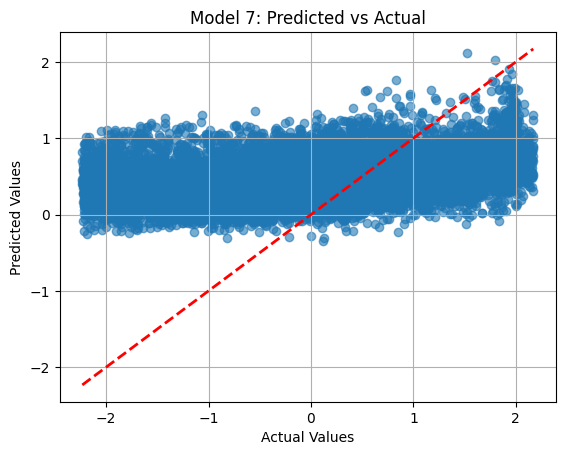

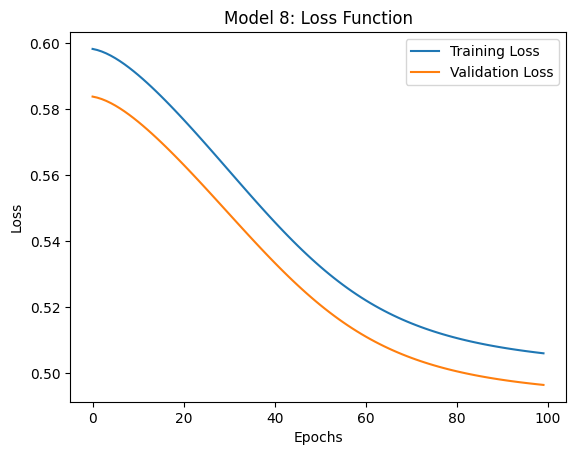

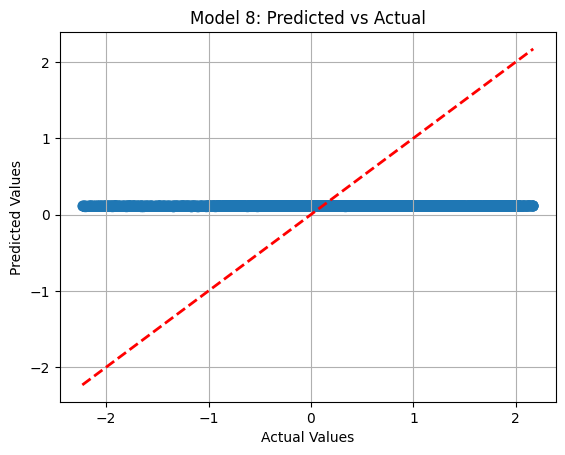

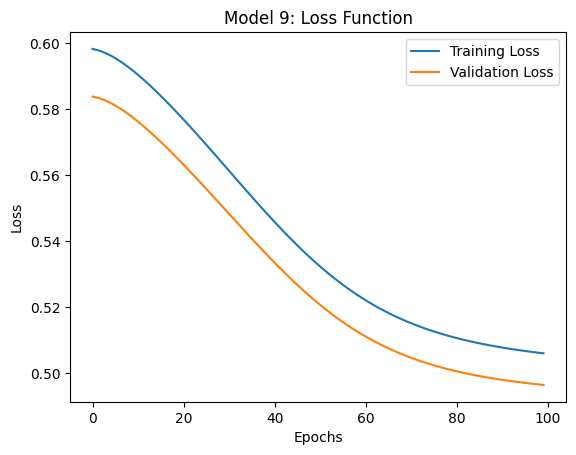

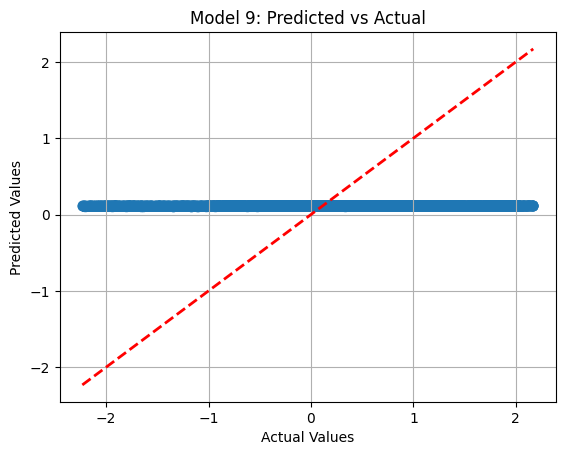

   Number of layers    Layer structure  Num epochs  Learning rate  Momentum  \
0                 3         [16, 9, 1]         100          0.100       0.9   
1                 3         [16, 9, 1]         100          0.100       0.5   
2                 3         [16, 9, 1]         100          0.025       0.1   
3                 3         [16, 9, 1]         100          0.015       0.1   
4                 4     [16, 12, 6, 1]         100          0.100       0.9   
5                 4     [16, 12, 6, 1]         100          0.025       0.1   
6                 4     [16, 12, 6, 1]         100          0.010       0.1   
7                 4     [16, 12, 6, 1]         100          0.005       0.1   
8                 5  [16, 12, 8, 4, 1]         100          0.050       0.9   
9                 5  [16, 12, 8, 4, 1]         100          0.050       0.9   

  Activation function       MSE       MAE        MAPE  
0             sigmoid  0.934272  0.768515  128.318531  
1                r

In [30]:
from matplotlib import pyplot as plt
from NeuralNet import NeuralNet

def plot_loss(model, i):
    losses = model.loss_epochs()
    plt.plot(losses[:, 0], label="Training Loss")
    if losses.shape[1] > 1 and losses[0, 1] is not None:
        plt.plot(losses[:, 1], label="Validation Loss")
    plt.title(f"Model {i}: Loss Function")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def scatter_plot_predictions(y_true, y_pred, i):
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)  # Line of perfect prediction
    plt.title(f"Model {i}: Predicted vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

# Define hyperparameter combinations
param_grid = [
    {'layers': [16, 9, 1], 'epochs': 100, 'lr': 0.1, 'momentum': 0.9, 'activation': 'sigmoid'},
    {'layers': [16, 9, 1], 'epochs': 100, 'lr': 0.1, 'momentum': 0.5, 'activation': 'relu'},
    {'layers': [16, 9, 1], 'epochs': 100, 'lr': 0.025, 'momentum': 0.1, 'activation': 'tanh'},
    {'layers': [16, 9, 1], 'epochs': 100, 'lr': 0.015, 'momentum': 0.1, 'activation': 'linear'},
    {'layers': [16, 12, 6, 1], 'epochs': 100, 'lr': 0.1, 'momentum': 0.9, 'activation': 'sigmoid'},
    {'layers': [16, 12, 6, 1], 'epochs': 100, 'lr': 0.025, 'momentum': 0.1, 'activation': 'relu'},
    {'layers': [16, 12, 6, 1], 'epochs': 100, 'lr': 0.01, 'momentum': 0.1, 'activation': 'tanh'},
    {'layers': [16, 12, 6, 1], 'epochs': 100, 'lr': 0.005, 'momentum': 0.1, 'activation': 'linear'},
    {'layers': [16, 12, 8, 4, 1], 'epochs': 100, 'lr': 0.05, 'momentum': 0.9, 'activation': 'sigmoid'},
    {'layers': [16, 12, 8, 4, 1], 'epochs': 100, 'lr': 0.05, 'momentum': 0.9, 'activation': 'sigmoid'},
]

results = []

for i, params in enumerate(param_grid):
    model = NeuralNet(
        layers=params['layers'],
        epochs=params['epochs'],
        lr=params['lr'],
        momentum=params['momentum'],
        activation=params['activation'],
        validation_split=0.2
    )

    # Fit the model
    model.fit(X_train, y_train)

    plot_loss(model, i)

    # Evaluate on test set
    y_test_pred = model.predict(X_test).flatten()

    # Scatter plot of predictions vs actual values
    scatter_plot_predictions(y_test.flatten(), y_test_pred.flatten(), i)

    mse = np.mean(np.square(y_test - y_test_pred))  # Mean Squared Error
    mae = np.mean(np.abs(y_test - y_test_pred))  # Mean Absolute Error
    mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100  # Mean Absolute Percentage Error

    # Record results
    results.append({
        'Number of layers': len(params['layers']),
        'Layer structure': params['layers'],
        'Num epochs': params['epochs'],
        'Learning rate': params['lr'],
        'Momentum': params['momentum'],
        'Activation function': params['activation'],
        'MSE': mse,
        'MAE': mae,
        'MAPE': mape,
    })

results_df = pd.DataFrame(results)
results_df.to_csv("model_results.csv", index=False)
print(results_df)